<a href="https://colab.research.google.com/github/AlexMiguel741/FashionMNIST/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for random operations. 
# This let our experiments to be reproducible. 
tf.random.set_seed(1234)  

## Dataset

### tf.data.Dataset.range

In [ ]:
# Create a Dataset of sequential numbers
# --------------------------------------
print("Dataset.range examples:")
print("-----------------------")

range_dataset = tf.data.Dataset.range(0, 20, 1)

print("\n1. Dataset")
for el in range_dataset:
    print(el)

# Divide in batches
bs = 3
range_dataset = tf.data.Dataset.range(0, 20, 1).batch(bs, drop_remainder=False)

print("\n2. Dataset + batch")
for el in range_dataset:
    print(el)

# Apply a transformation to each element
def map_fn(x):
    return x**2

range_dataset = tf.data.Dataset.range(0, 20, 1).batch(bs, drop_remainder=False).map(map_fn)

print("\n3. Dataset + batch + map")
for el in range_dataset:
    print(el)

# Filter dataset based on a condition
def filter_fn(x):
    return tf.equal(tf.math.mod(x, 2), 0)

range_dataset = tf.data.Dataset.range(0, 20, 1).filter(filter_fn)

print("\n4. Dataset + filter")
for el in range_dataset:
    print(el)

# Random shuffling
range_dataset = tf.data.Dataset.range(0, 20, 1).shuffle(
    buffer_size=20, reshuffle_each_iteration=False, seed=1234).batch(bs)

print("\n5. Dataset + shuffle + batch")
for el in range_dataset:
    print(el)



### tf.data.Dataset.from_tensors

In [ ]:
# Create Dataset as unique element
# --------------------------------
from_tensors_dataset = tf.data.Dataset.from_tensors([1, 2, 3, 4, 5, 6, 7, 8, 9])

print("Dataset.from_tensors example:")
print("-----------------------------")
for el in from_tensors_dataset:
    print(el)

### tf.data.Dataset.from_tensor_slices

In [ ]:
# Create a Dataset of slices
# --------------------------

# All the elements must have the same size in first dimension (axis 0)
from_tensor_slices_dataset = tf.data.Dataset.from_tensor_slices(
    (np.random.uniform(size=[10, 2, 2]), np.random.randint(10, size=[10])))

print("Dataset.from_tensor_slices example:")
print("-----------------------------")
for el in from_tensor_slices_dataset:
    print(el)

### tf.data.Dataset.zip

In [ ]:
# Combine multiple datasets
# -------------------------
x = tf.data.Dataset.from_tensor_slices(np.random.uniform(size=10))
y = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6, 7, 8, 9])

zipped = tf.data.Dataset.zip((x, y))

print("Dataset.from_tensors example:")
print("-----------------------------")
for el in zipped:
    print(el)

In [ ]:
# Iterate over range dataset
# --------------------------

# for a in b
for el in zipped:
    print(el)
    
print('\n')
    
# for a in enumerate(b)
for el_idx, el in enumerate(zipped):
    print(el)
    
print('\n')
    
# get iterator
iterator = iter(zipped)
print(next(iterator))

# Example: Fashion MNIST - Multi-class classification
## Dataset

In [ ]:
# Load built-in dataset
# ---------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
x_train.shape
y_train.shape

(60000, 28, 28)

(60000,)

In [ ]:
# Split in training and validation sets
# e.g., 50000 samples for training and 10000 samples for validation

x_valid = x_train[50000:, ...] 
y_valid = y_train[50000:, ...] 

x_train = x_train[:50000, ...]
y_train = y_train[:50000, ...]

In [ ]:
# Create Training Dataset object
# ------------------------------
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

# Shuffle
train_dataset = train_dataset.shuffle(buffer_size=x_train.shape[0])

# Normalize images
def normalize_img(x_, y_):
    return tf.cast(x_, tf.float32) / 255., y_

train_dataset = train_dataset.map(normalize_img)

# 1-hot encoding <- for categorical cross entropy
def to_categorical(x_, y_):
    return x_, tf.one_hot(y_, depth=10)

train_dataset = train_dataset.map(to_categorical)

# Divide in batches
bs = 32
train_dataset = train_dataset.batch(bs)

# Repeat
# Without calling the repeat function the dataset 
# will be empty after consuming all the images
train_dataset = train_dataset.repeat()

In [ ]:
# Create Validation Dataset  
# -----------------------
valid_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))

# Normalize images
valid_dataset = valid_dataset.map(normalize_img)

# 1-hot encoding
valid_dataset = valid_dataset.map(to_categorical)

# Divide in batches
valid_dataset = valid_dataset.batch(1)

# Repeat
valid_dataset = valid_dataset.repeat()

In [ ]:
# Create Test Dataset
# -------------------
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

test_dataset = test_dataset.map(normalize_img)

test_dataset = test_dataset.map(to_categorical)

test_dataset = test_dataset.batch(1)

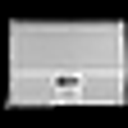

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)>

In [ ]:
# Check that is everything is ok with the dataloader

iterator = iter(train_dataset)
sample, target = next(iterator)

# Just for visualization purpouses
sample_ = sample[0, ...]  # select first image in the batch

from PIL import Image
img = Image.fromarray(np.uint8(np.array(sample_)*255.))
img = img.resize([128, 128])
img

sample_
target[0]  # select corresponding target

## Model

In [ ]:
# Fashion MNIST classification
# ----------------------------

# x: 28x28
# y: 10 classes

# Create Model
# ------------
# e.g. in: 28x28 -> h: 10 units -> out: 10 units (number of classes) 

# Define Input keras tensor
x = tf.keras.Input(shape=[28, 28])

# Define intermediate hidden layers and chain
flatten = tf.keras.layers.Flatten()(x)  
h = tf.keras.layers.Dense(units=10, activation=tf.keras.activations.sigmoid)(flatten)

# Define output layer and chain

# Define the last fully-connected layer, which is composed by 10 neurons (the number of classes). 
# Finally, the softmax activation function is applied for multiclass classification
out = tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax)(h) 

# Create Model instance defining inputs and outputs
model = tf.keras.Model(inputs=x, outputs=out) # Note: you can have a model with multiple inputs and multiple outputs

In [ ]:
# Visualize created model as a table

# I can visualise the model I create and the weights initialisation
model.summary()

# Visualize initialized weights
model.weights
# As you can see it will show you the size of the output of your layers and the number of parameters (weights + biases)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


[<tf.Variable 'dense/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[-0.03036179, -0.06281489,  0.0257396 , ...,  0.03800482,
         -0.01909882,  0.05336354],
        [-0.00394604,  0.00170591, -0.0514029 , ...,  0.05030797,
          0.0382886 , -0.03114992],
        [ 0.0818864 ,  0.05883654,  0.04829731, ..., -0.05160644,
         -0.05101755,  0.05875803],
        ...,
        [ 0.05402381, -0.00915979, -0.02856489, ...,  0.04777338,
          0.05148549, -0.08004379],
        [ 0.03537666,  0.06979673, -0.05969963, ...,  0.01393002,
          0.06334465, -0.04543552],
        [ 0.03403018, -0.05196487, -0.00468538, ..., -0.01439087,
          0.05410584,  0.00825624]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(10, 10) dtype=float32, numpy=
 array([[ 0.10681671, -0.21565178,  0.54518306,  0.33767676, -0.09082237,
         -0.52187

In [ ]:
# Equivalent formulation
# ----------------------

# Create model with sequential 
# (uncomment to run)
# seq_model = tf.keras.Sequential()
# seq_model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # or as a list
# seq_model.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.sigmoid))
# seq_model.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax))

In [ ]:
# seq_model.summary()
# seq_model.weights

## Prepare the model for training

In [ ]:
# Optimization params
# -------------------

# Before training the network we have to 'compile' the model by defining the following hyperparameters

# Loss
loss = tf.keras.losses.CategoricalCrossentropy()

# Learning rate
lr = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
# -------------------

# Validation metrics
# ------------------

# Define the metrics we want to compute during validation 
# (keras will automatically evaluate them also on the training set). 
# In this example we compute the accuracy, i.e., the frequency of correctly predicted classes

metrics = ['accuracy']
# ------------------

# Finally, we call model.compile

# Compile Model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

## Training

In [ ]:
# Now we are ready to start training our network. 
# This is done by calling the 'fit' function. We need to set some parameters. The main ones are:

# 1) Training set. 
# 'x' and 'y' params represent the input and targets for training, respectively. 
# If we have a dataloader which already provides <input, target> pairs, we have to set only the 'x' param.
# If you have a very small dataset, it could be convenient instead to set 'x' and 'y' directly with your
# numpy arrays containing all your training set (e.g., x = x_train, y = y_train in the example).

# 2) Number of epochs (how many times we want to process all the dataset).

# 3) Steps per epoch, i.e., (# training images) / (batch size)

# 4) Validation set
# 'validation_data' will be our dataloader for the validation set (also in this case we can give the numpy array directly).
# 'validation_steps' is similar to the 'steps_per_epoch'. In the example it is 10000, since we have 
# chosen arbitrarily a batch size of 1 sample for the validation dataset. 

model.fit(x=train_dataset,  # you can give directly numpy arrays x_train
          y=None,   
          epochs=10, 
          steps_per_epoch=int(np.ceil(x_train.shape[0] / bs)),  # how many batches per epoch
          validation_data=valid_dataset,  
          validation_steps=10000)  # number of batches in validation set

# Here we are! While the network is training keras provides useful information. 
# In particular, we can see the loss and the metrics computed on training batches, and, at the end of each epoch,
# the same quantities are computed on the validation set (very useful to understand if we are overfitting..).
# But we can also inspect these and other details in a smarter way..see you next lesson!:) 

Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1452 - accuracy: 0.6908 - val_loss: 0.7189 - val_accuracy: 0.7898
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6047 - accuracy: 0.8115 - val_loss: 0.5370 - val_accuracy: 0.8241
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4977 - accuracy: 0.8362 - val_loss: 0.4842 - val_accuracy: 0.8343
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.4553 - accuracy: 0.8464 - val_loss: 0.4545 - val_accuracy: 0.8428
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.4325 - accuracy: 0.8521 - val_loss: 0.4436 - val_accuracy: 0.8453
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4174 - accuracy: 0.8547 - val_loss: 0.4281 - val_accuracy: 0.8514
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.4050 - accuracy: 0.8590 - val_loss: 0.4248 - v

In [ ]:
predictions = model.predict(x_test)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
y_test[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

<Figure size 432x216 with 0 Axes>

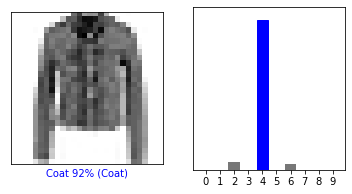

In [ ]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

<Figure size 864x720 with 0 Axes>

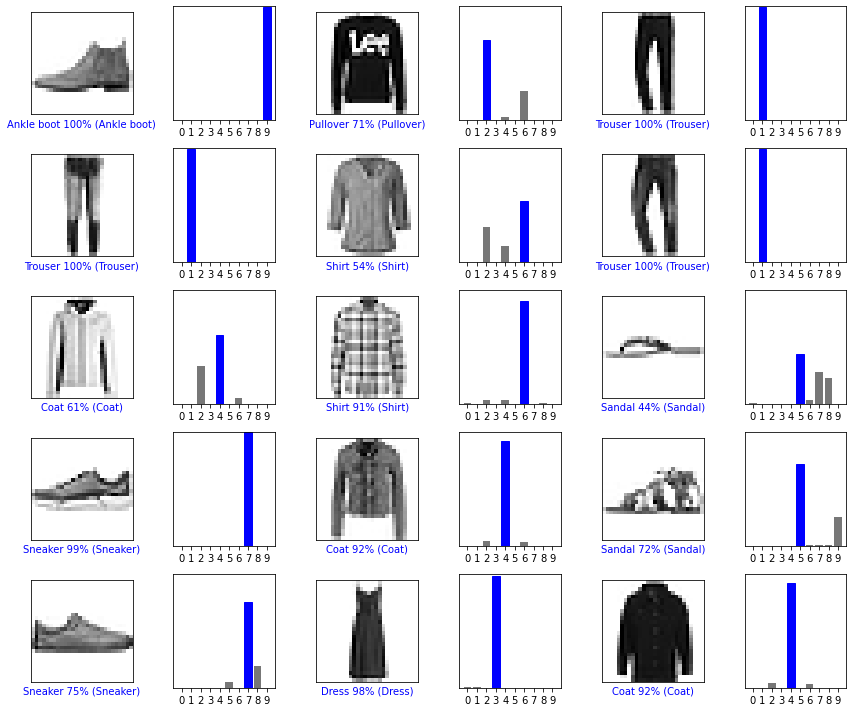

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()